In [1]:
import torch
from torch.nn import *
import torch.nn.functional as F
from pandas_datareader import data as web
import os
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from utils import *

DEVICE:  cpu


In [3]:
T=30

In [4]:
etfs = ['XLB','XLE','XLF','XLI','XLP','XLV','XLY','XLU']
metric2 = "Squared_Returns"
metrics = ["ATR",metric2]
start = '2001-01-01'
end = '2020-01-01'
start_t = '2022-01-02'
end_t = '2024-01-05'
models = {}
lrs = [0]
hl1 = 50
hl2 = 50
hl1s = [20,50,70,100]
hl1s = [20,50,70,100]

[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLB


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLB
On the 48th day, Bought 5.507616855733114 shares for $479.7134281343542
On the 49th day, Bought 2.5031783785878092 shares for $221.53128650502111
On the 50th day, Bought 1.501980205020746 shares for $133.61615903864555
On the 51th day, Bought 0.5008604066105036 shares for $44.5615503761365
On the 52th day, Bought 0.5005230357634487 shares for $44.881900616908446
On the 53th day, Bought 0.0 shares for $0.0
On the 54th day, Bought 0.0 shares for $0.0
On the 55th day, Bought 0.0 shares for $0.0
On the 56th day, Bought 0.0 shares for $0.0
On the 57th day, Bought 0.0 shares for $0.0
On the 75th day, sold 10.514158881715622 shares for $901.273699340663
On the 220th day, Bought 6.0063067270589885 shares for $485.48977274817804
On the 222th day, Bought 2.5034857796697967 shares for $208.59043516208743
On the 307th day, Bought 1.5016797306048768 shares for $119.23337061002722
On the 308th day, Bought 1.0010386858551743 shares for $79.37235740145678
On t

[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLB


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLB
On the 77th day, Bought 5.50000086090203 shares for $483.3400756560703
On the 78th day, sold 5.50000086090203 shares for $464.9150727720486
On the 84th day, Bought 5.500000775623464 shares for $451.77006370971134
On the 88th day, sold 5.500000775623464 shares for $453.3100639268859
On the 110th day, Bought 6.5000012426423135 shares for $482.69009227861824
On the 111th day, Bought 3.0000003948845135 shares for $222.1200292372494
On the 112th day, Bought 1.5000001573589303 shares for $114.60001202222229
On the 113th day, sold 11.000001794885758 shares for $825.2201346523295
On the 117th day, Bought 6.500001230206034 shares for $469.1050887839695
On the 118th day, Bought 3.5000005156931806 shares for $253.92503741354025
On the 119th day, Bought 1.5000003021194441 shares for $110.98502235381767
On the 123th day, Bought 1.0000001509471101 shares for $71.4900107912089
On the 124th day, Bought 0.5000000616673734 shares for $35.45500437283345
On the 12

[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLE


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLE
On the 199th day, Bought 5.513524087267356 shares for $495.66581544533534
On the 200th day, Bought 2.5075238373169206 shares for $221.5898815036963
On the 225th day, Bought 1.5040733933327908 shares for $130.9747110914194
On the 254th day, Bought 0.5016740992561194 shares for $44.137287252553385
On the 255th day, Bought 0.5018089953078436 shares for $45.0524115987382
On the 282th day, Bought 0.0 shares for $0.0
On the 284th day, Bought 0.0 shares for $0.0
On the 285th day, Bought 0.0 shares for $0.0
On the 294th day, sold 10.52860441248103 shares for $810.3866816286649
On the 306th day, Bought 5.016167834704311 shares for $435.6040147657224
On the 314th day, Bought 2.5043192911385637 shares for $217.7255191715867
On the 315th day, Bought 1.0016299989895447 shares for $86.14017991310085
On the 316th day, Bought 0.5012461699740716 shares for $42.98687153697638
On the 317th day, Bought 0.5008561563873575 shares for $42.59280753918088
On the 318th 

[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLE


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLE
On the 65th day, Bought 6.0000019204735455 shares for $483.6001547901677
On the 69th day, sold 6.0000019204735455 shares for $442.08014150049087
XLE Final Value: 958.4799867103231, Final Money: 958.4799867103231, Final Shares: 0.0


[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLF


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLF
On the 51th day, Bought 12.513883909895934 shares for $499.1788291657488
On the 52th day, Bought 6.006009351180451 shares for $237.2373693716278
On the 53th day, Bought 3.003041985132681 shares for $117.62915455764711
On the 54th day, Bought 1.501326112480248 shares for $57.921161419487966
On the 125th day, Bought 1.001060648216669 shares for $31.21307101139574
On the 136th day, Bought 0.5004195961347608 shares for $16.709010314939665
On the 141th day, Bought 0.5004644923022114 shares for $16.985764868737053
On the 142th day, Bought 0.0 shares for $0.0
On the 143th day, Bought 0.0 shares for $0.0
On the 144th day, Bought 0.0 shares for $0.0
On the 145th day, Bought 0.0 shares for $0.0
On the 146th day, Bought 0.0 shares for $0.0
On the 147th day, Bought 0.0 shares for $0.0
On the 192th day, sold 25.026206095342957 shares for $795.0825676490457
On the 217th day, Bought 11.008797073287651 shares for $393.89475928223214
On the 218th day, Bought 5.

[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLF


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLF
On the 120th day, Bought 15.500010647859934 shares for $499.7203432870043
On the 153th day, sold 15.500010647859934 shares for $530.5653644762455
On the 309th day, Bought 16.000012594703215 shares for $509.92040139319147
On the 455th day, sold 16.000012594703215 shares for $538.8804241896042
XLF Final Value: 1059.8050439856538, Final Money: 1059.8050439856538, Final Shares: 0.0


[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLI


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLI
On the 36th day, Bought 5.012066987718634 shares for $490.881840777163
On the 37th day, Bought 2.5058912664447845 shares for $247.60711603740916
On the 38th day, Bought 1.0020196276939193 shares for $97.81715605548041
On the 39th day, Bought 0.5011853550088096 shares for $49.76770575237479
On the 40th day, Bought 0.5011568973511933 shares for $49.37898909601307
On the 41th day, Bought 0.0 shares for $0.0
On the 42th day, Bought 0.0 shares for $0.0
On the 43th day, Bought 0.0 shares for $0.0
On the 44th day, Bought 0.0 shares for $0.0
On the 45th day, Bought 0.0 shares for $0.0
On the 46th day, Bought 0.0 shares for $0.0
On the 47th day, Bought 0.0 shares for $0.0
On the 48th day, Bought 0.0 shares for $0.0
On the 49th day, Bought 0.0 shares for $0.0
On the 50th day, Bought 0.0 shares for $0.0
On the 51th day, Bought 0.0 shares for $0.0
On the 52th day, Bought 0.0 shares for $0.0
On the 53th day, Bought 0.0 shares for $0.0
On the 54th day, Bough

[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLI


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLI
On the 101th day, Bought 5.000000299708517 shares for $475.40002849628576
On the 103th day, sold 5.000000299708517 shares for $440.5500264073174
On the 223th day, Bought 4.500000306479933 shares for $452.97003085027006
On the 225th day, Bought 2.500000136180682 shares for $252.12501373382176
On the 269th day, Bought 1.00000008346866 shares for $102.840008583917
On the 352th day, Bought 0.5000000293831123 shares for $51.3450030173518
On the 358th day, Bought 0.5000000311925853 shares for $52.1800032552582
On the 361th day, Bought 0.0 shares for $0.0
On the 365th day, Bought 0.0 shares for $0.0
On the 367th day, Bought 0.0 shares for $0.0
On the 369th day, Bought 0.0 shares for $0.0
On the 372th day, Bought 0.0 shares for $0.0
On the 373th day, Bought 0.0 shares for $0.0
On the 374th day, Bought 0.0 shares for $0.0
On the 378th day, Bought 0.0 shares for $0.0
On the 379th day, Bought 0.0 shares for $0.0
On the 380th day, Bought 0.0 shares for $0.

[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLP


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLP
On the 50th day, Bought 6.5080468668841664 shares for $488.55907829699436
On the 51th day, Bought 3.002347517642977 shares for $227.99827048980765
On the 52th day, Bought 1.5010647888663282 shares for $113.66062581295837
On the 53th day, Bought 1.0010541283453454 shares for $76.06009267167934
On the 54th day, Bought 0.500522850148817 shares for $38.05475229681456
On the 55th day, Bought 0.0 shares for $0.0
On the 56th day, Bought 0.0 shares for $0.0
On the 76th day, sold 12.513036151887633 shares for $977.518384185462
On the 133th day, Bought 7.007003245452376 shares for $513.2629877293865
On the 156th day, Bought 3.502872609161298 shares for $259.2476018040277
On the 219th day, Bought 1.501149216913699 shares for $114.04230600893372
On the 220th day, Bought 0.500401108654626 shares for $37.91038799167446
On the 221th day, Bought 0.5002987549344211 shares for $37.83259184814093
On the 222th day, Bought 0.0 shares for $0.0
On the 224th day, Boug

[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLP


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLP
On the 446th day, Bought 7.000000793332322 shares for $470.6800533436653
On the 447th day, Bought 3.5000003724356112 shares for $236.6000251766473
On the 452th day, sold 10.500001165767934 shares for $711.7950790274083
On the 454th day, Bought 7.000000951175129 shares for $483.4900656976661
On the 462th day, Bought 3.500000309783948 shares for $246.40002180878994
On the 467th day, Bought 1.5000001784019146 shares for $104.70001245245363
On the 468th day, Bought 1.0000001133362344 shares for $70.1600079516702
On the 483th day, sold 13.000001552697228 shares for $926.1201106141505
XLP Final Value: 1025.8850032106664, Final Money: 1025.8850032106664, Final Shares: 0.0


[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLV


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLV
On the 48th day, Bought 3.508452691708834 shares for $472.0272251425065
On the 49th day, Bought 1.5052039741004886 shares for $204.8582608750765
On the 50th day, Bought 1.0030701942731115 shares for $136.9190815182797
On the 51th day, Bought 0.5009318163198813 shares for $69.32896337867157
On the 52th day, Bought 0.0 shares for $0.0
On the 53th day, Bought 0.0 shares for $0.0
On the 54th day, Bought 0.0 shares for $0.0
On the 55th day, Bought 0.0 shares for $0.0
On the 56th day, Bought 0.0 shares for $0.0
On the 57th day, Bought 0.0 shares for $0.0
On the 58th day, Bought 0.0 shares for $0.0
On the 75th day, sold 6.517658676402315 shares for $846.5786854778967
On the 123th day, Bought 3.5082883163794483 shares for $447.86808646900033
On the 126th day, Bought 1.5033944067520206 shares for $195.93739303199087
On the 127th day, Bought 1.0033137159151606 shares for $129.23683974703184
On the 134th day, Bought 0.5013122262900463 shares for $66.25843

[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLV


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLV
On the 71th day, Bought 3.5000007646375195 shares for $462.6301010697874
On the 80th day, Bought 2.000000469846323 shares for $255.48006001816933
On the 85th day, Bought 1.000000161610661 shares for $130.90002115483554
On the 86th day, Bought 0.5000000764711235 shares for $65.22000997489336
On the 92th day, Bought 0.0 shares for $0.0
On the 93th day, Bought 0.0 shares for $0.0
On the 99th day, Bought 0.0 shares for $0.0
On the 100th day, Bought 0.0 shares for $0.0
On the 106th day, Bought 0.0 shares for $0.0
On the 107th day, Bought 0.0 shares for $0.0
On the 108th day, Bought 0.0 shares for $0.0
On the 109th day, Bought 0.0 shares for $0.0
On the 113th day, Bought 0.0 shares for $0.0
On the 114th day, Bought 0.0 shares for $0.0
On the 120th day, Bought 0.0 shares for $0.0
On the 121th day, Bought 0.0 shares for $0.0
On the 134th day, Bought 0.0 shares for $0.0
On the 141th day, Bought 0.0 shares for $0.0
On the 142th day, Bought 0.0 shares for

[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLY


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLY
On the 30th day, Bought 2.5118856986436544 shares for $438.22357898537194
On the 31th day, Bought 1.504817804573321 shares for $266.60857043625526
On the 32th day, Bought 0.5022391070434039 shares for $88.07767220220174
On the 33th day, Bought 0.5015973411343625 shares for $89.94643521221388
On the 34th day, Bought 0.0 shares for $0.0
On the 35th day, Bought 0.0 shares for $0.0
On the 36th day, Bought 0.0 shares for $0.0
On the 37th day, Bought 0.0 shares for $0.0
On the 38th day, Bought 0.0 shares for $0.0
On the 39th day, Bought 0.0 shares for $0.0
On the 40th day, Bought 0.0 shares for $0.0
On the 41th day, Bought 0.0 shares for $0.0
On the 42th day, Bought 0.0 shares for $0.0
On the 43th day, Bought 0.0 shares for $0.0
On the 44th day, Bought 0.0 shares for $0.0
On the 45th day, Bought 0.0 shares for $0.0
On the 46th day, Bought 0.0 shares for $0.0
On the 47th day, Bought 0.0 shares for $0.0
On the 48th day, Bought 0.0 shares for $0.0
On th

[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLY


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLY
On the 64th day, Bought 2.5000003661254326 shares for $444.5250651007632
On the 71th day, Bought 1.5000002981522607 shares for $253.80005044736248
On the 72th day, Bought 0.5000000603044491 shares for $85.22501027889335
On the 75th day, Bought 0.5000000816395272 shares for $82.59001348521711
On the 78th day, Bought 0.0 shares for $0.0
On the 79th day, Bought 0.0 shares for $0.0
On the 81th day, Bought 0.0 shares for $0.0
On the 85th day, Bought 0.0 shares for $0.0
On the 86th day, Bought 0.0 shares for $0.0
On the 87th day, Bought 0.0 shares for $0.0
On the 88th day, Bought 0.0 shares for $0.0
On the 92th day, Bought 0.0 shares for $0.0
On the 93th day, Bought 0.0 shares for $0.0
On the 94th day, Bought 0.0 shares for $0.0
On the 95th day, Bought 0.0 shares for $0.0
On the 99th day, Bought 0.0 shares for $0.0
On the 100th day, Bought 0.0 shares for $0.0
On the 105th day, Bought 0.0 shares for $0.0
On the 106th day, Bought 0.0 shares for $0.0
On

[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLU


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLU
On the 47th day, Bought 7.012958212072574 shares for $496.79795974322116
On the 48th day, Bought 3.5037001123708587 shares for $249.32329999631028
On the 49th day, Bought 1.5016922465072278 shares for $108.1218417485204
On the 50th day, Bought 0.5006309783021338 shares for $36.470966769310444
On the 51th day, Bought 0.5005460869763216 shares for $36.64998448840627
On the 52th day, Bought 0.0 shares for $0.0
On the 53th day, Bought 0.0 shares for $0.0
On the 54th day, Bought 0.0 shares for $0.0
On the 55th day, Bought 0.0 shares for $0.0
On the 75th day, sold 13.019527636229116 shares for $921.7825566450214
On the 151th day, Bought 6.007350019006509 shares for $464.54837696977336
On the 152th day, Bought 3.0031370589275346 shares for $229.7399850079564
On the 154th day, Bought 1.5013043426605792 shares for $114.99991264780036
On the 155th day, Bought 1.0007639021014292 shares for $76.97875934964193
On the 156th day, Bought 0.5004795885202399 sha

[*********************100%***********************]  1 of 1 completed


read  4779  lines of data for ticker:  XLU


[*********************100%***********************]  1 of 1 completed


read  504  lines of data for ticker:  XLU
On the 111th day, Bought 7.000001918950376 shares for $477.33013085322614
On the 112th day, sold 7.000001918950376 shares for $486.9901335013776
On the 126th day, Bought 7.0000014817406 shares for $487.20010312914576
On the 136th day, sold 7.0000014817406 shares for $518.2101096932566
On the 188th day, Bought 8.50000164417082 shares for $515.01509962031
On the 189th day, sold 8.50000164417082 shares for $528.2751021852165
On the 203th day, Bought 8.000001279246513 shares for $526.0800841232508
On the 207th day, sold 8.000001279246513 shares for $526.0000841104583
On the 280th day, Bought 7.500001982867329 shares for $502.050132733139
On the 287th day, Bought 4.000001050470923 shares for $261.8400687638266
On the 298th day, sold 11.500003033338253 shares for $732.5501932236467
On the 307th day, Bought 7.500001556079602 shares for $508.9501055955618
On the 308th day, Bought 3.5000009277217132 shares for $244.5800648291933
On the 309th day, sold 1

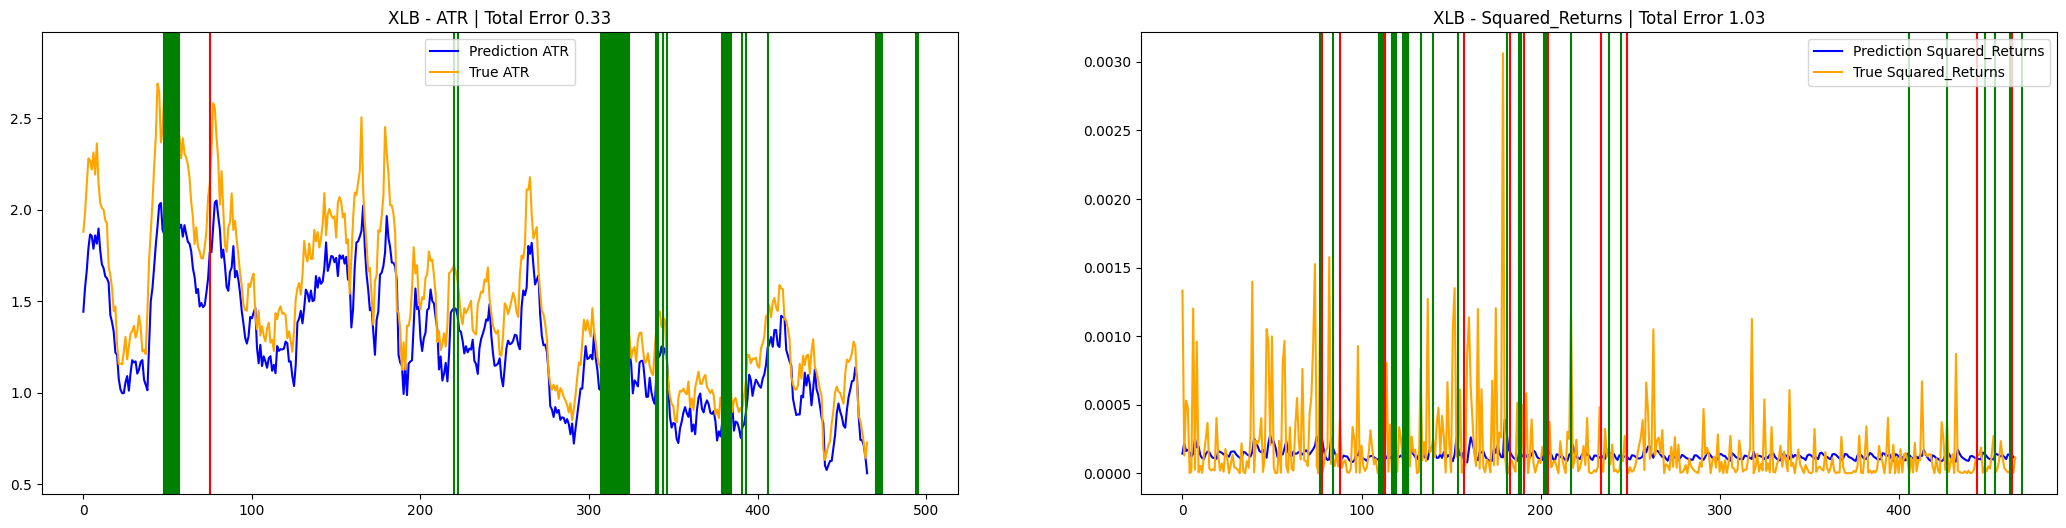

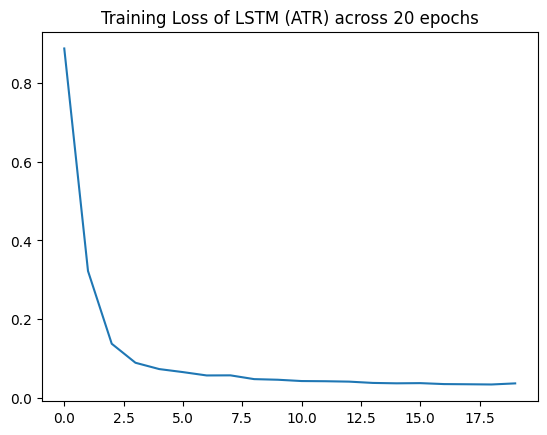

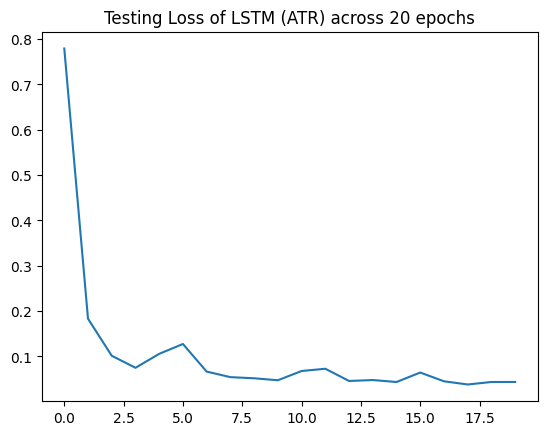

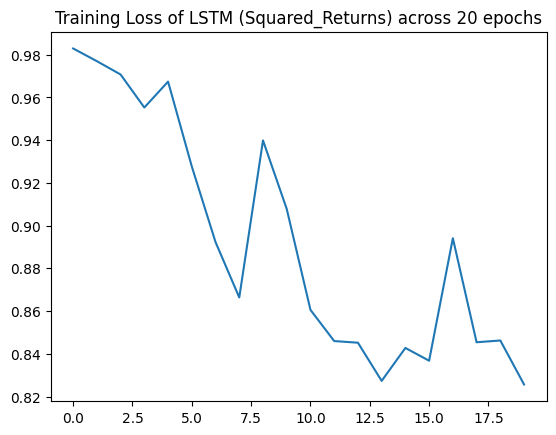

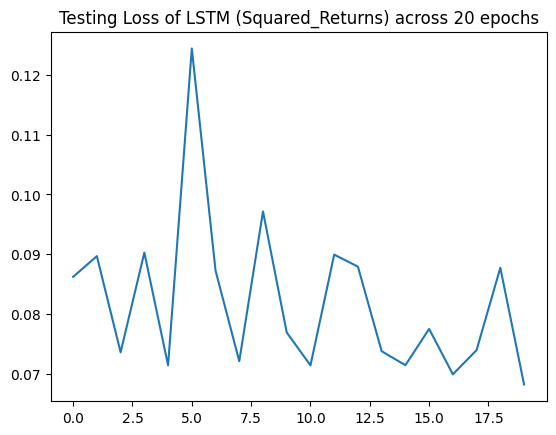

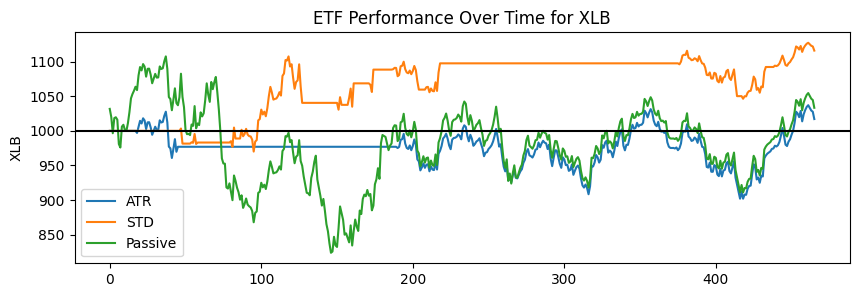

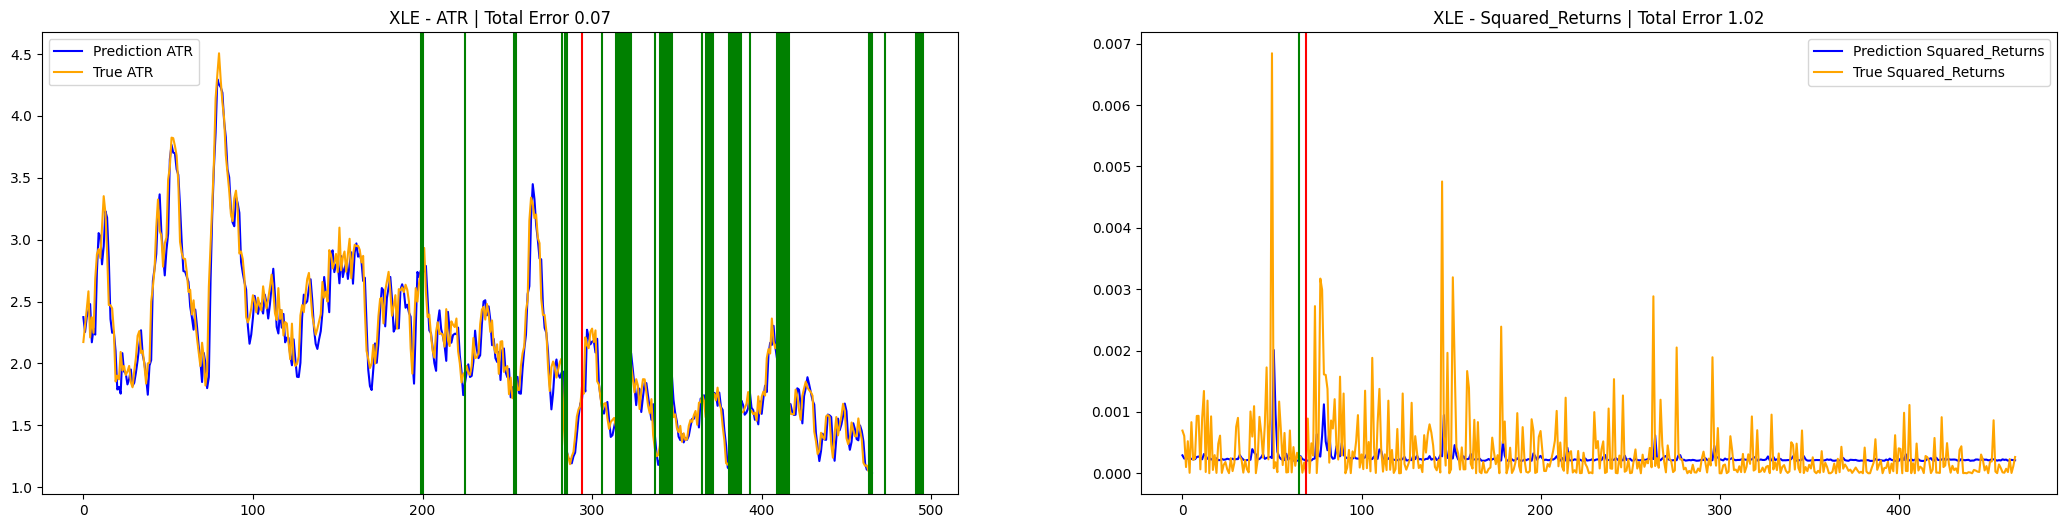

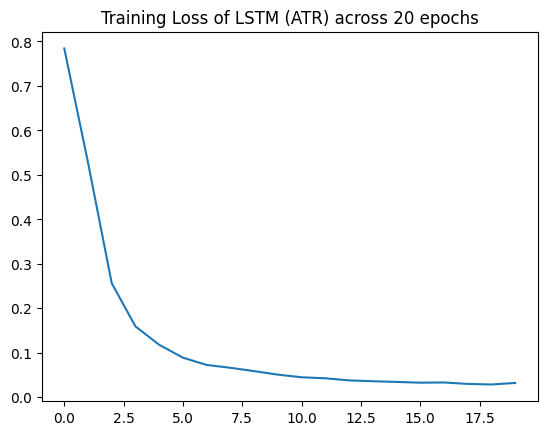

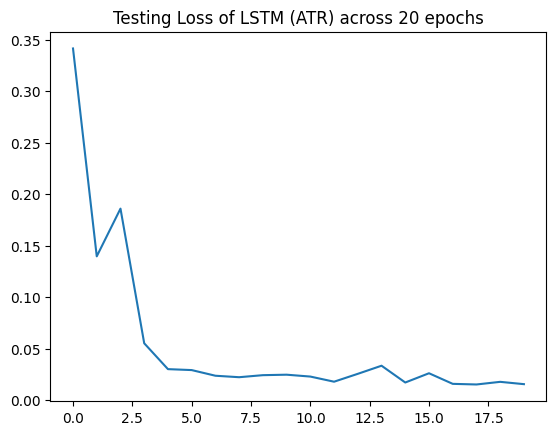

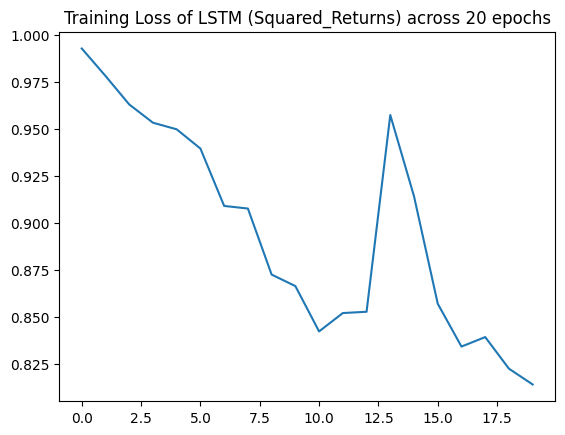

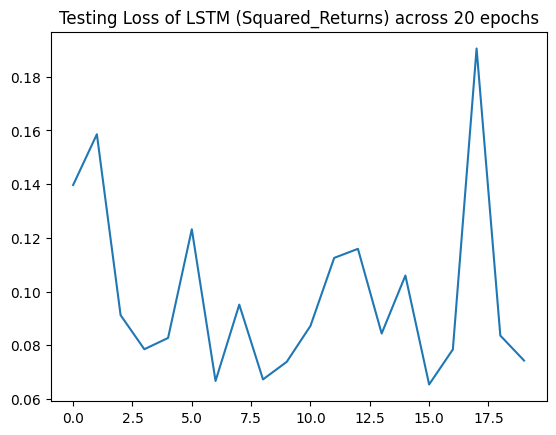

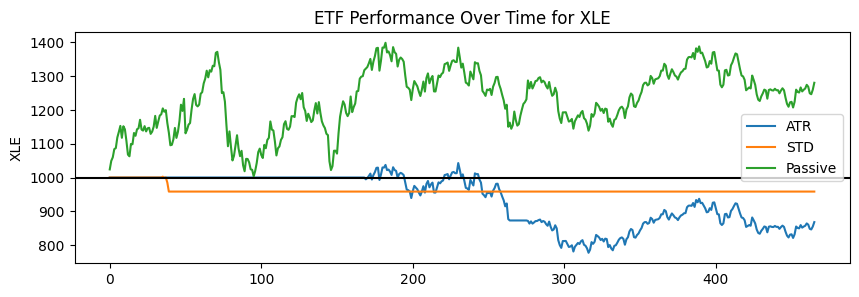

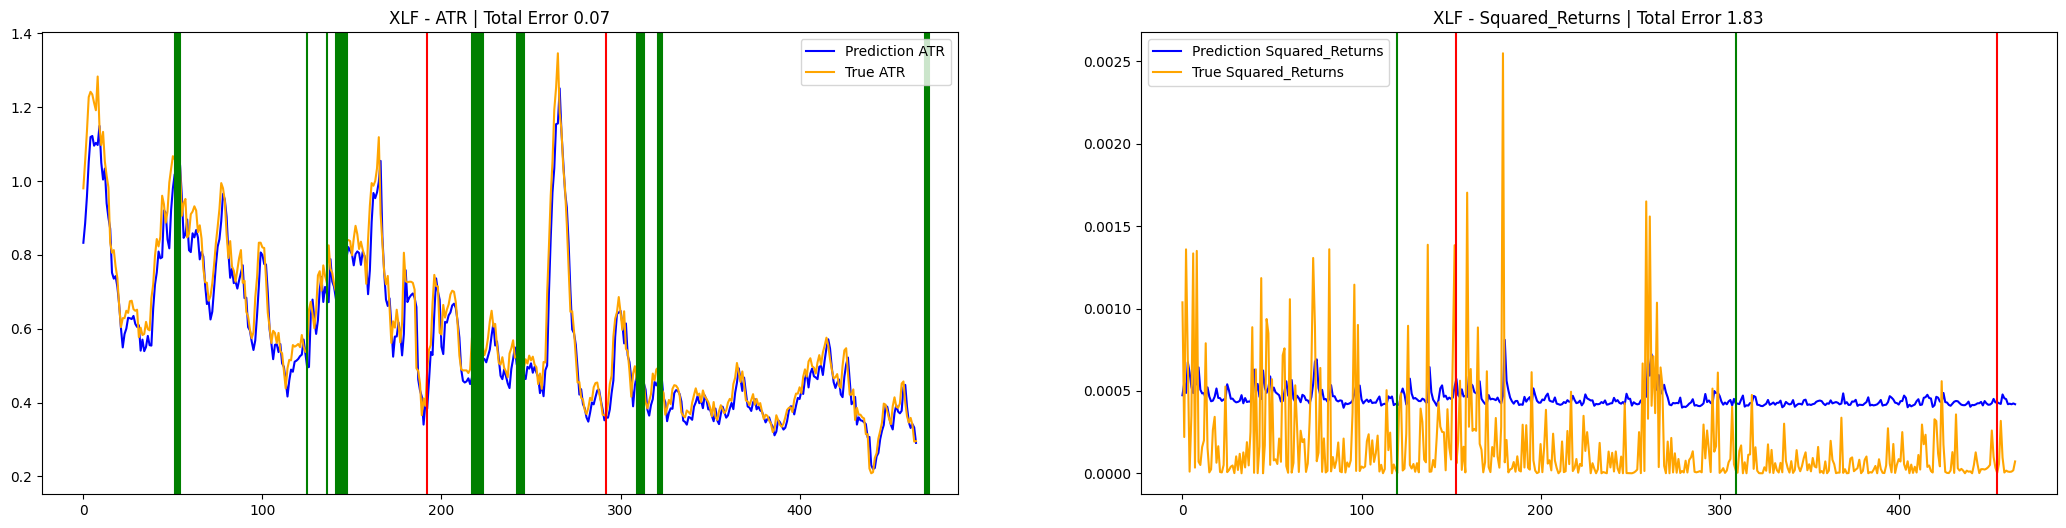

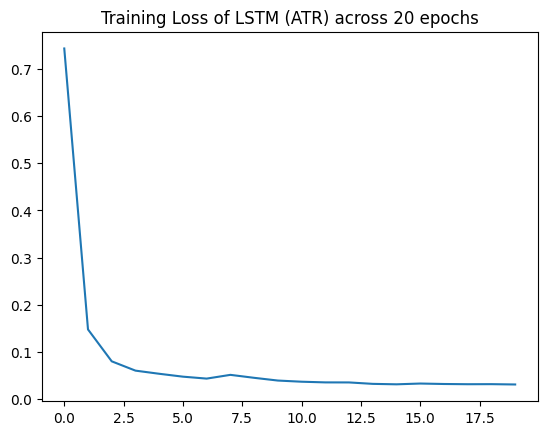

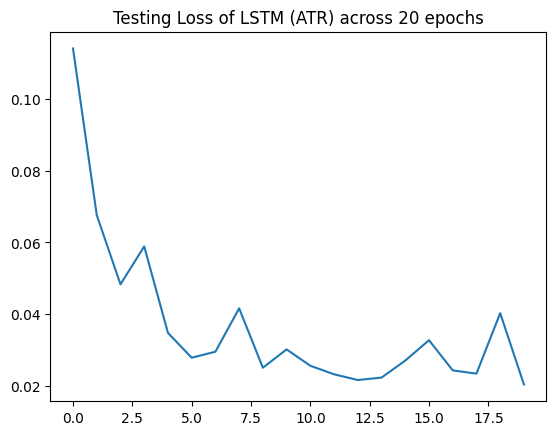

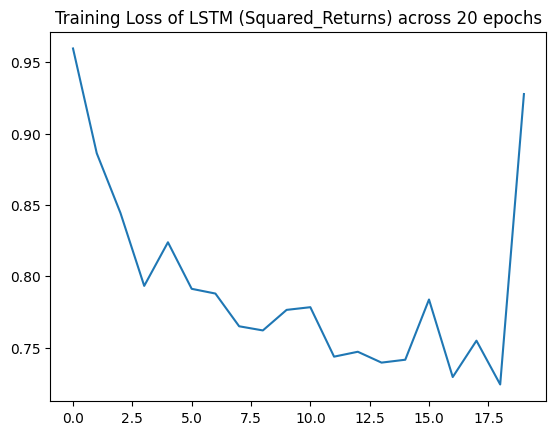

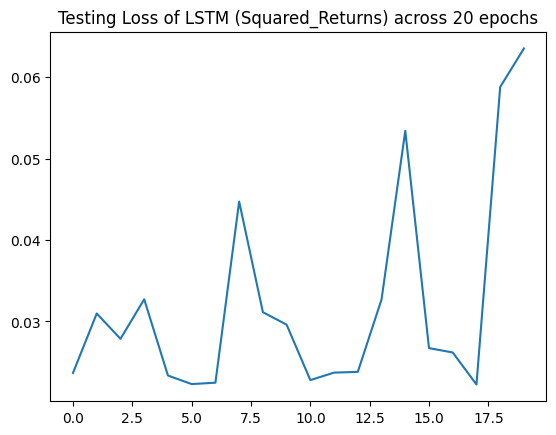

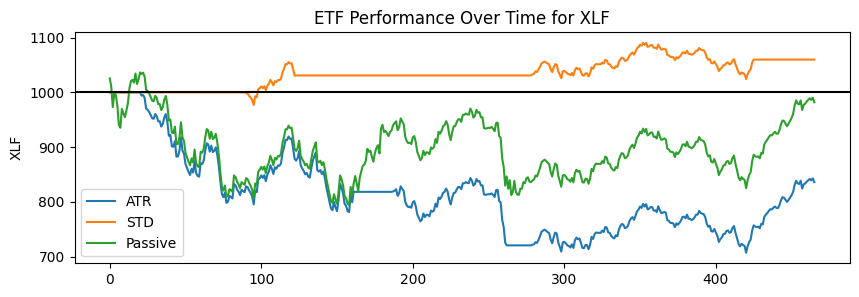

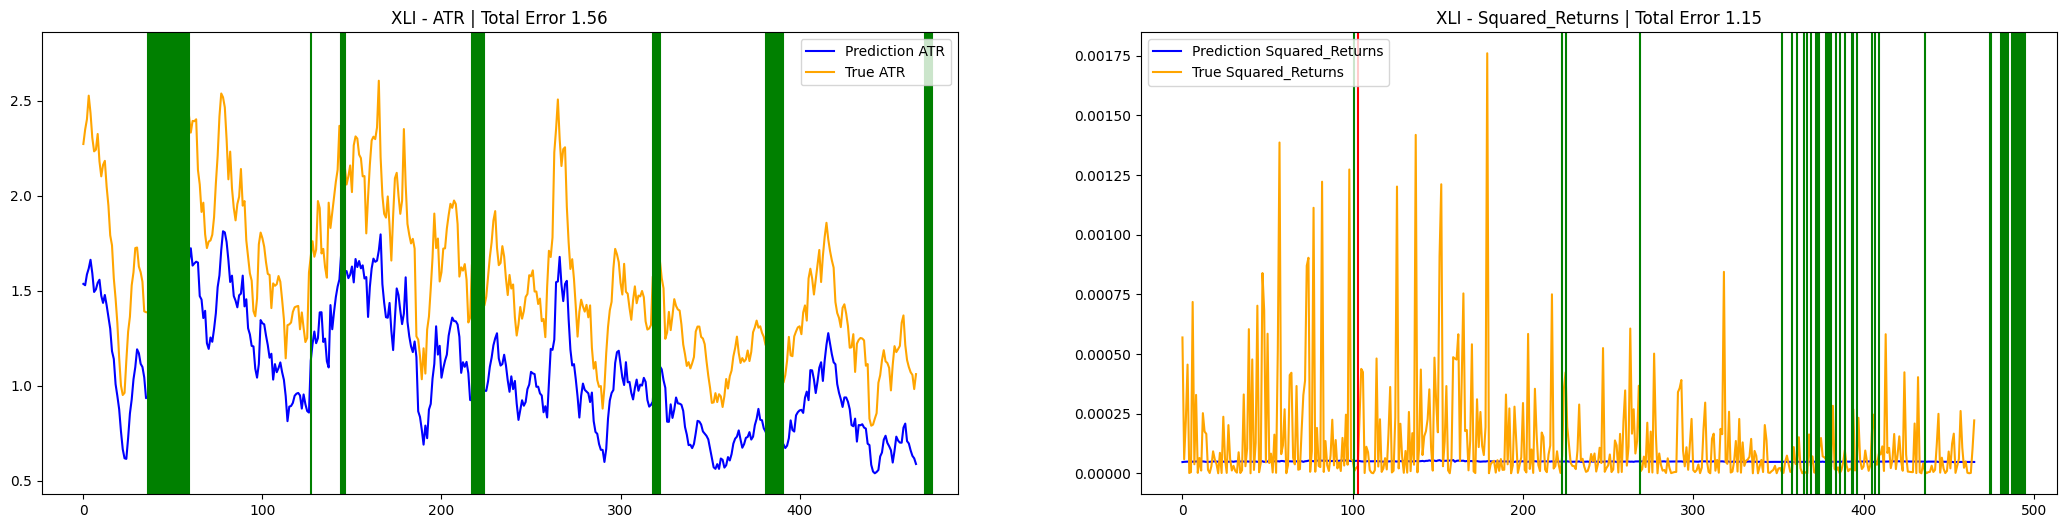

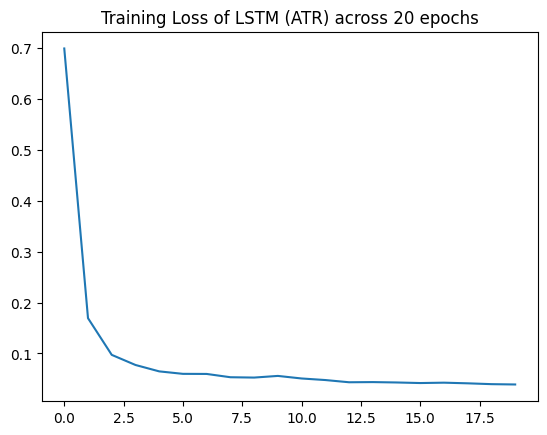

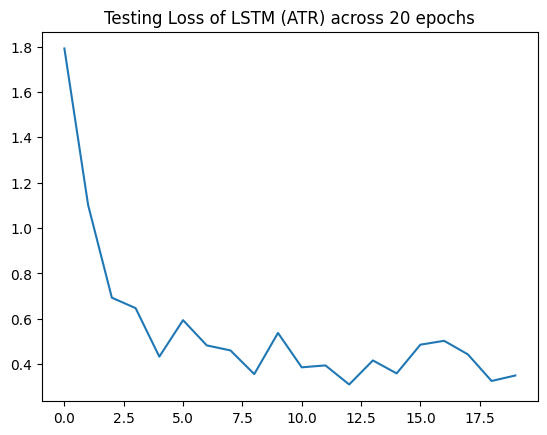

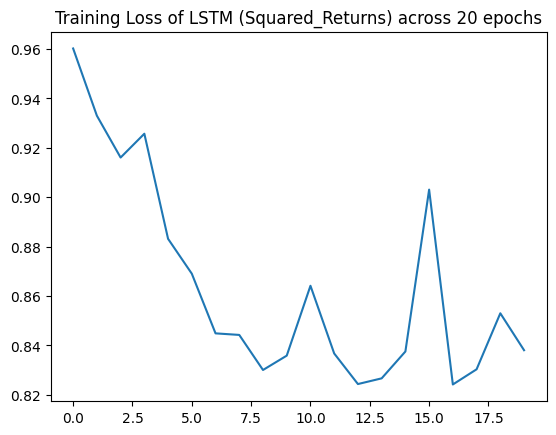

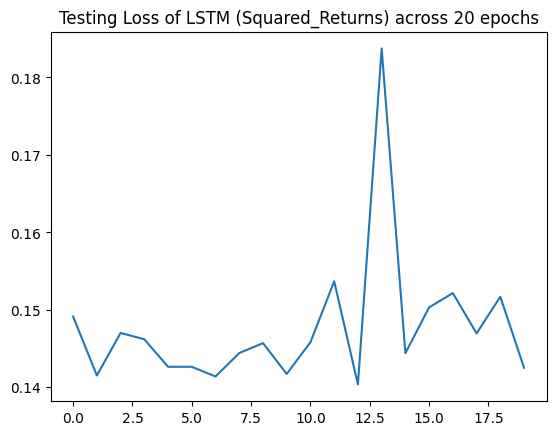

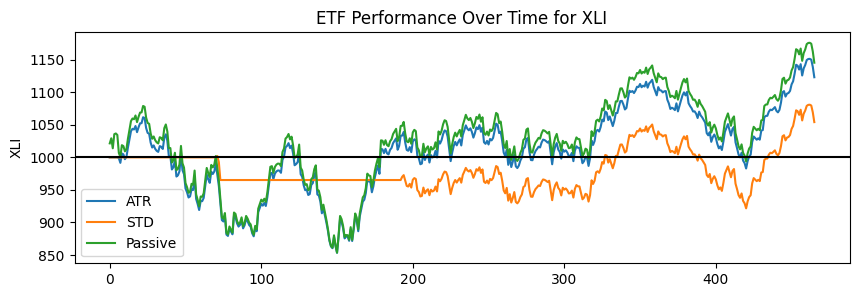

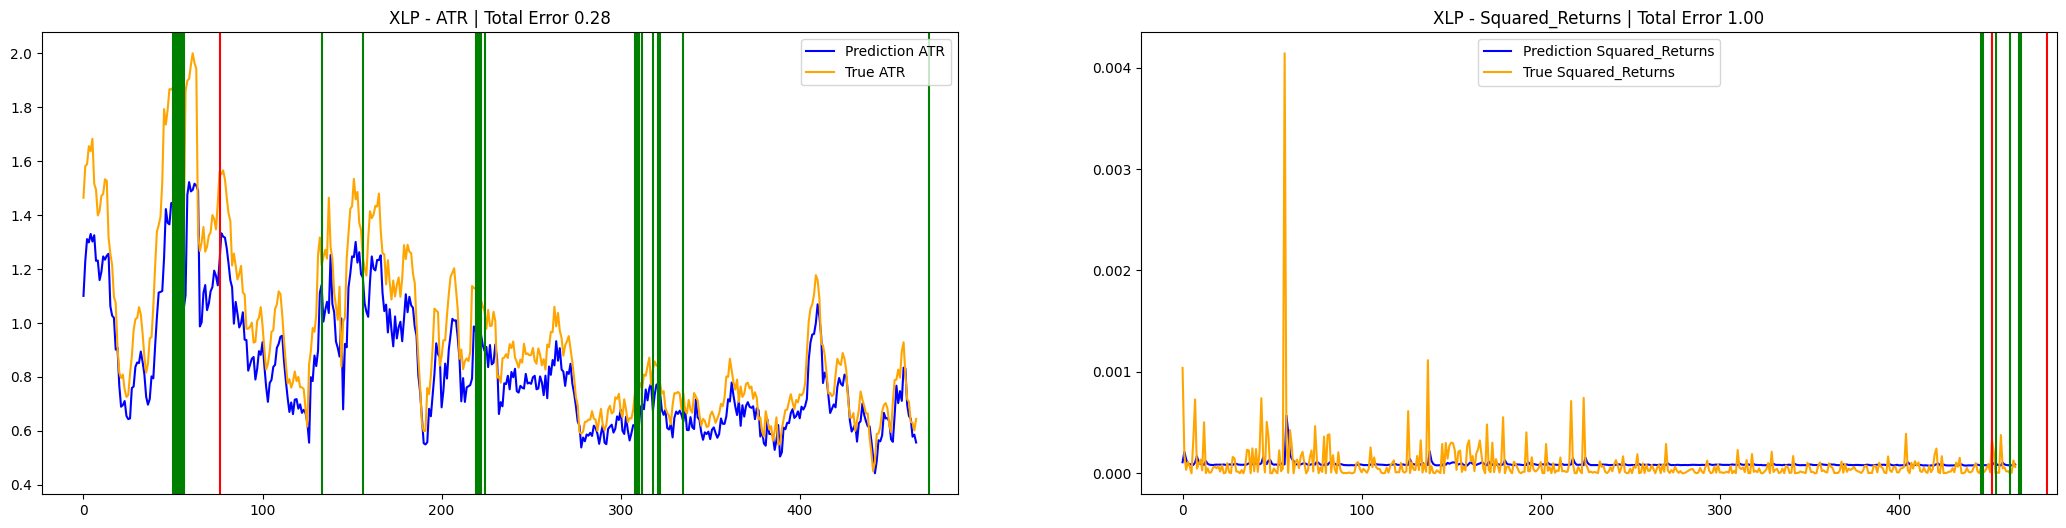

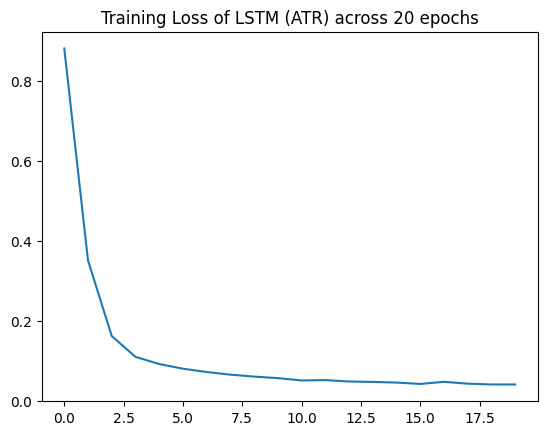

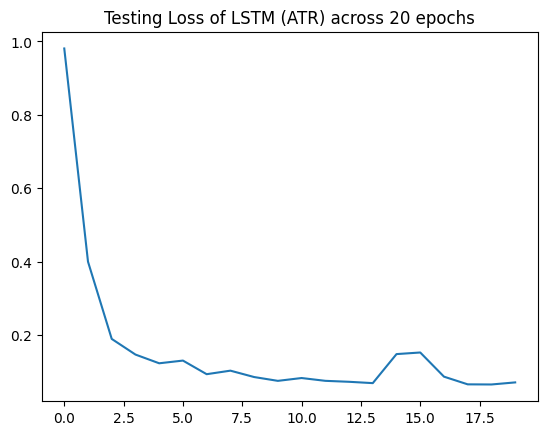

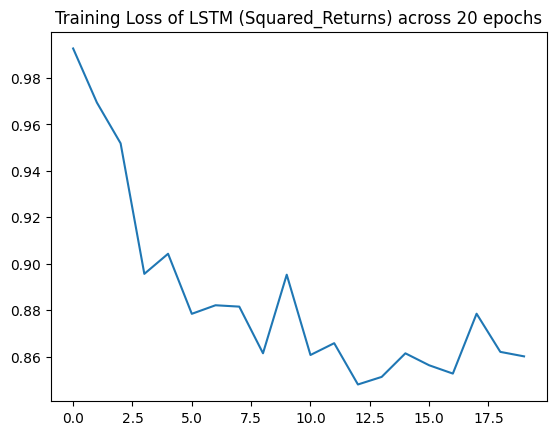

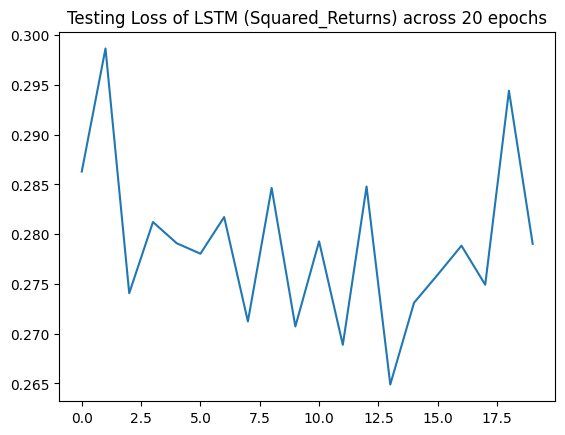

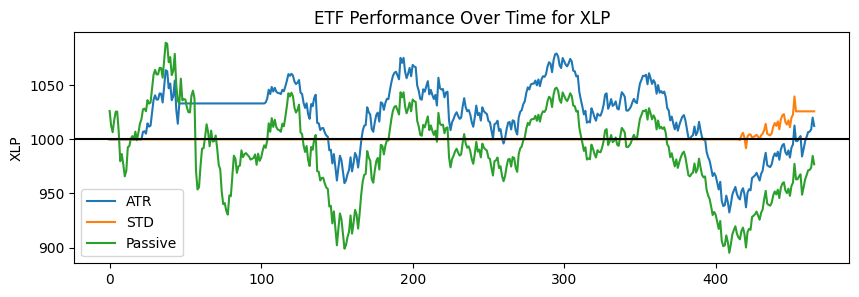

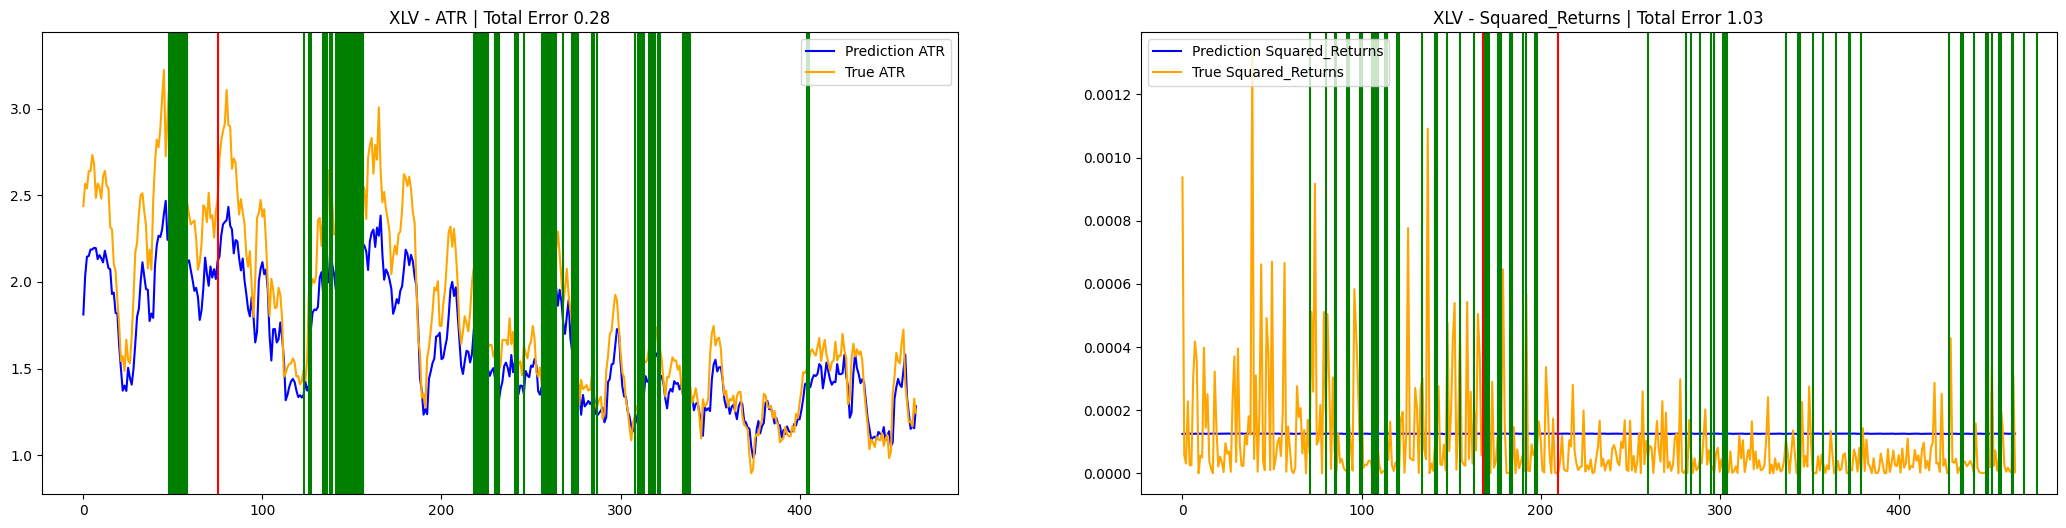

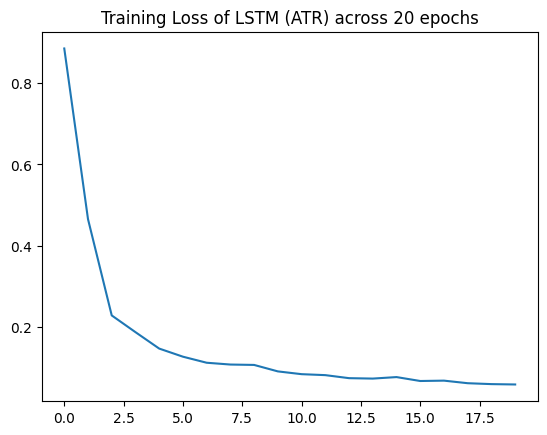

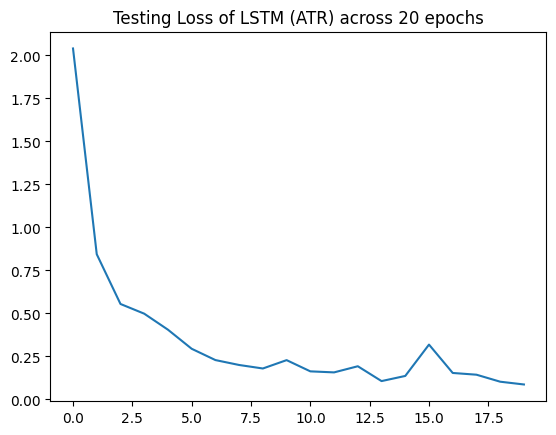

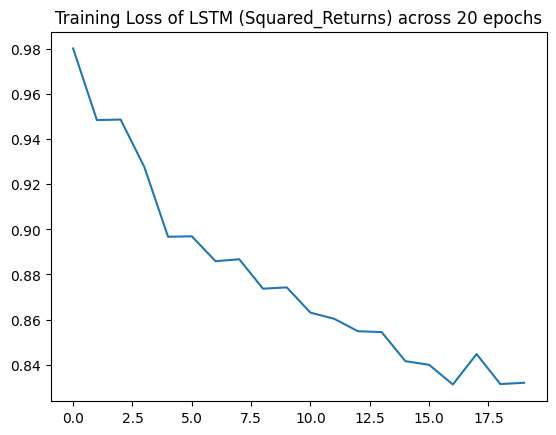

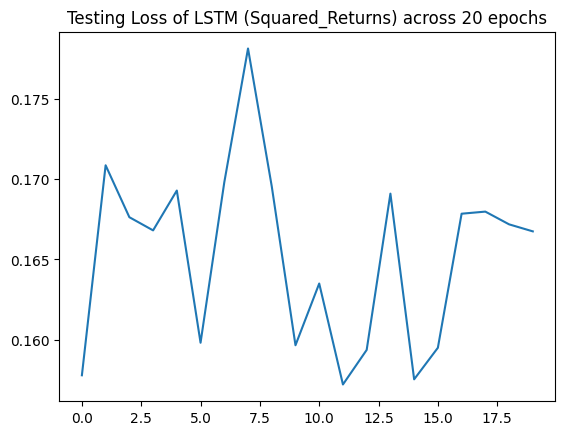

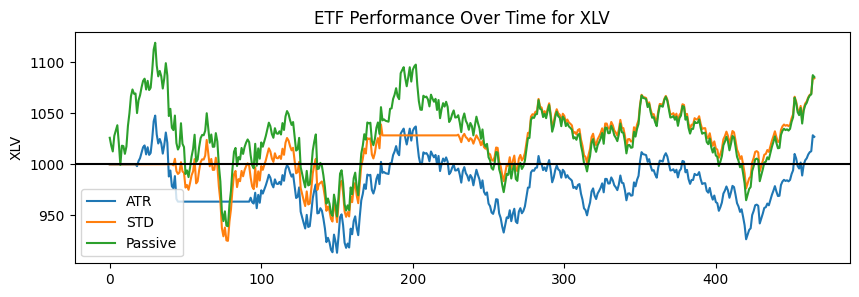

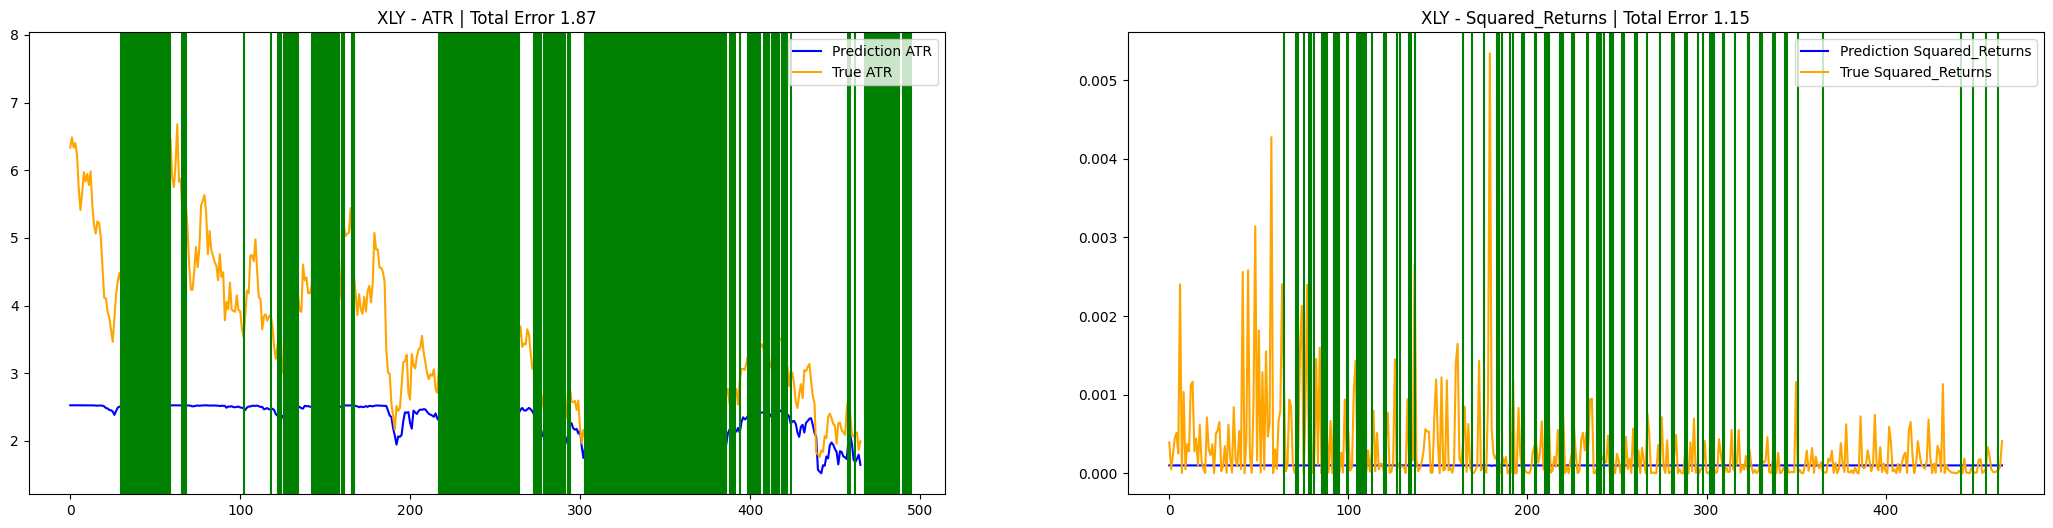

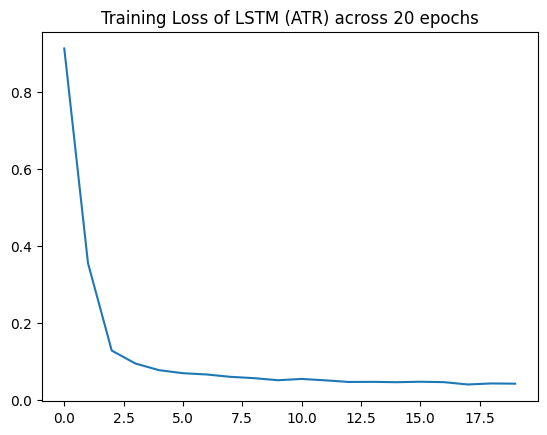

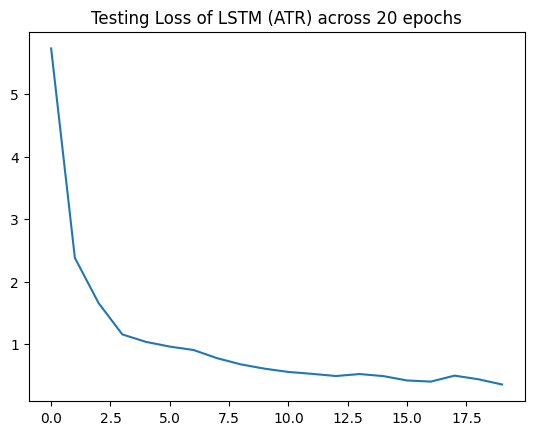

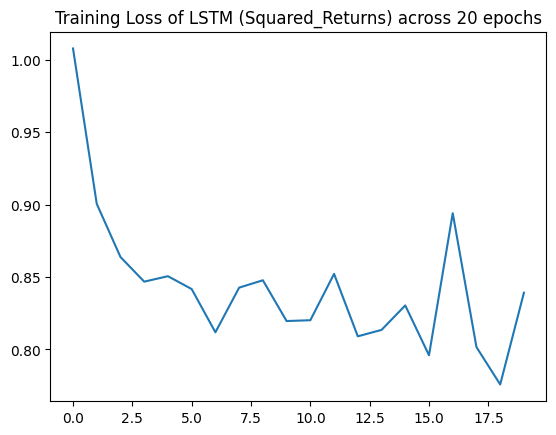

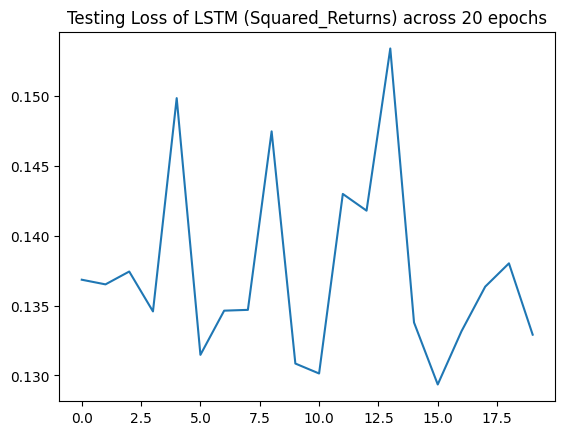

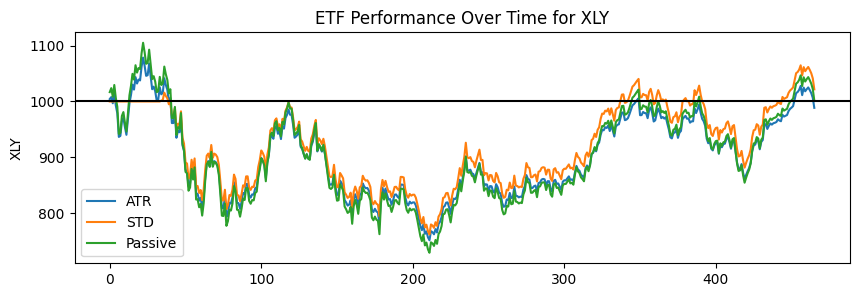

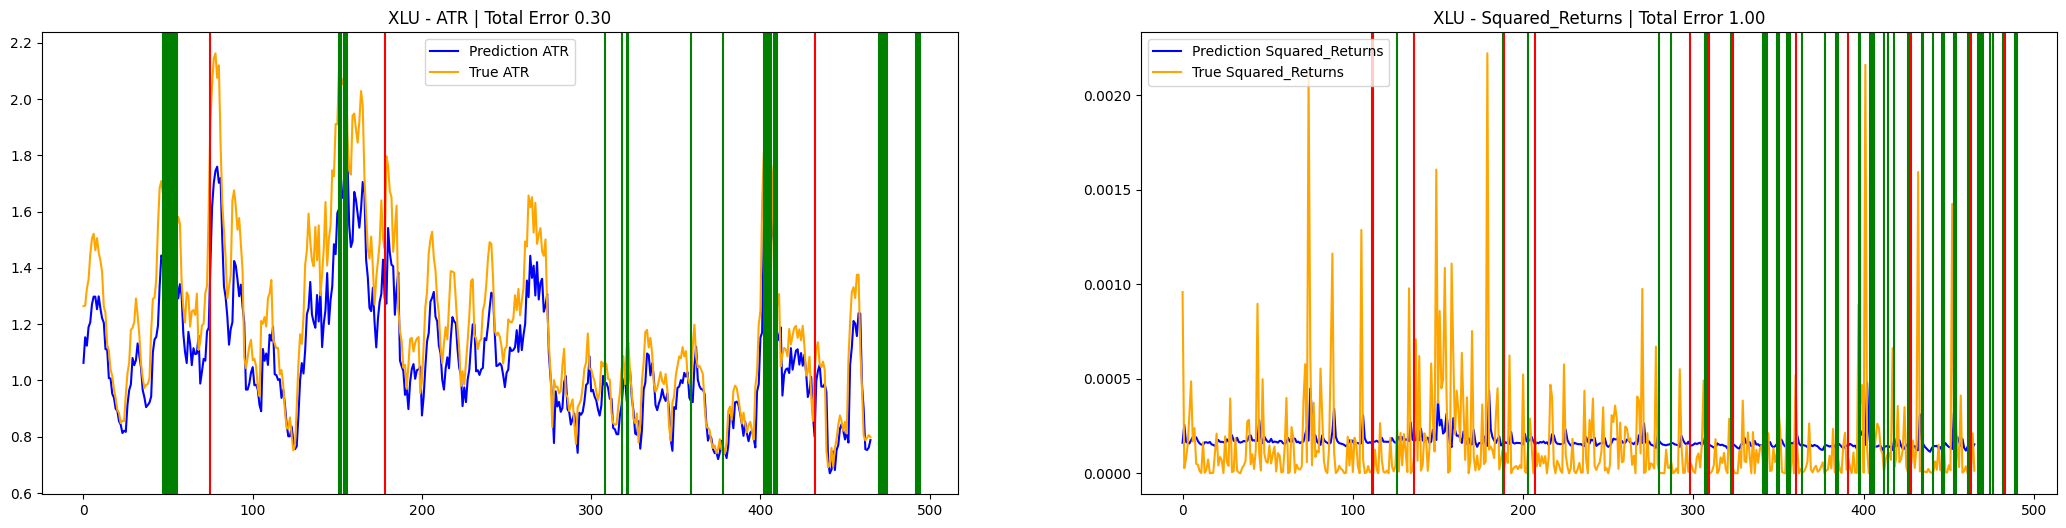

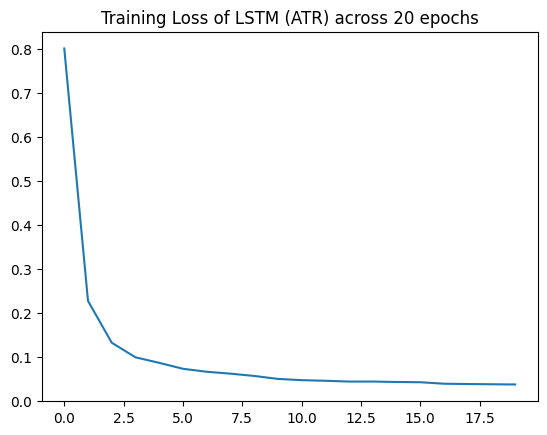

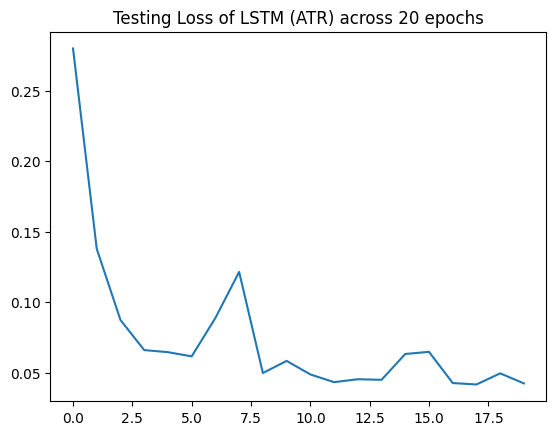

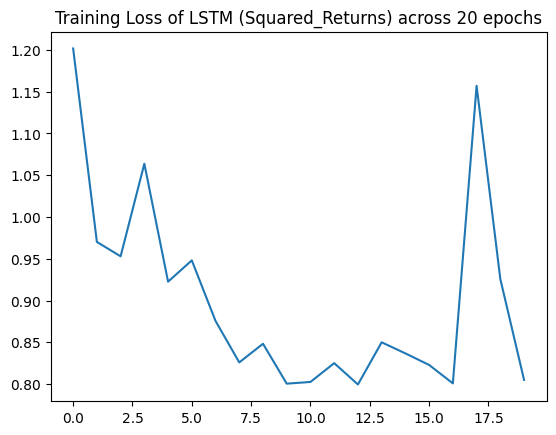

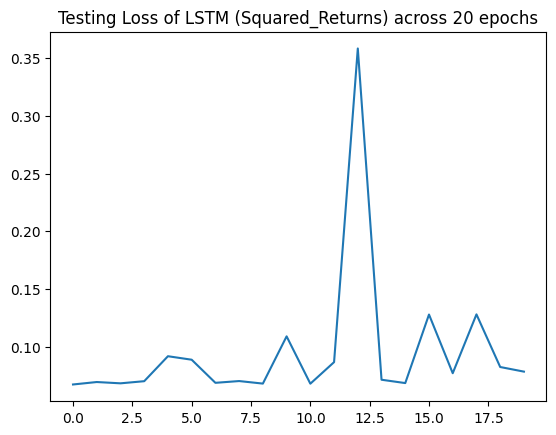

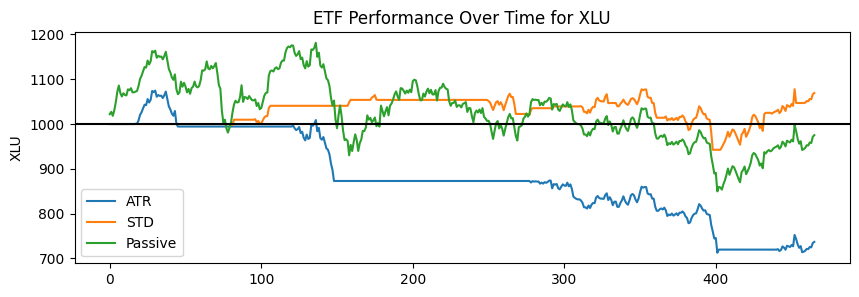

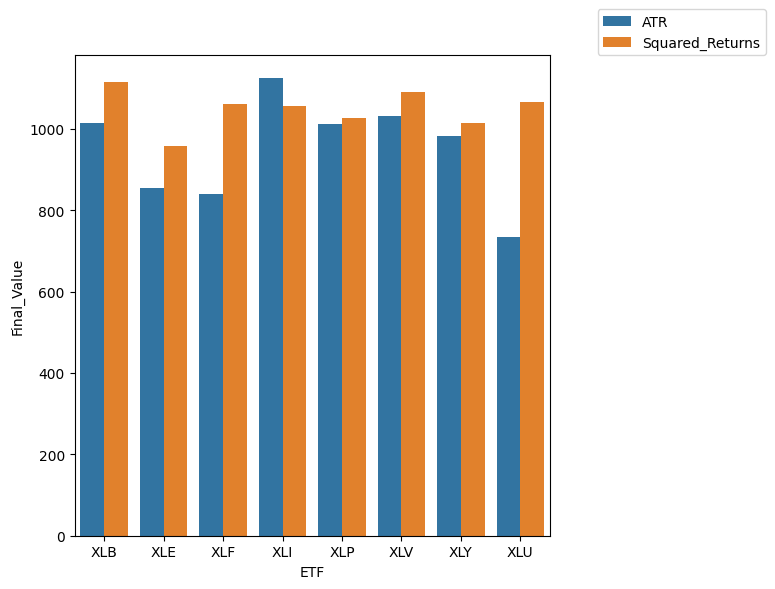

In [5]:
num=10
for file in os.listdir():
    if "runtest" in file:
        num+=1
os.mkdir(f'./runtest_{num}')
with open(f'./runtest_{num}/run_data.txt','w') as f:
    f.write(f'Start Training Date: {start} \n End Training Date: {end} \n Start Sim Date: {start_t} \n End Sim Date: {end_t} \n')
    #f.write(f'Model Architecture: \n HL1: {hl1}, HL2: {hl2} \n')
    f.write(f'Look-back window: {T} days')

for etf in etfs:
    os.mkdir(f'./runtest_{num}/{etf}')
for lr in lrs:
    results = pd.DataFrame({"ETF":[],"Metric":[],"Final_Value":[],"Passive_Potential":[],"Relative_MSE":[]})
    money_df_std = pd.DataFrame()
    money_df_atr = pd.DataFrame()
    money_df_passive = pd.DataFrame()
    for j,etf in enumerate(etfs):
        fig,ax = plt.subplots(1,len(metrics),figsize=(26,6))
        for i,metric in enumerate(metrics):
            scaler = StandardScaler()
            df = get_cleaned_df(etf,start,end)
            #print(df)
            model,fig_tr,fig_te = get_trained_model(df,scaler,metric=metric)
            fig_tr.savefig(f'./runtest_{num}/{etf}/training_results_{metric}')
            fig_te.savefig(f'./runtest_{num}/{etf}/testing_results_{metric}')
            df_test = get_cleaned_df(etf,start_t,end_t)
            ini_cash = 10000
            final_value, money, shares,passive_value,buy_points,sell_points,preds, t_money,p_money = backtest_strategy(df_test,model,scaler,metric,sell_scale=1,buy_scale=1)
            print(f"{etf} Final Value: {final_value}, Final Money: {money}, Final Shares: {shares}")
            
            if metric=="ATR":
               money_df_atr[etf] = t_money
            elif metric=="Squared_Returns":
                money_df_std[etf] = t_money
                money_df_passive[f"{etf}_{metric}_Passive"] = p_money

            real_met = np.array(df_test[metric].iloc[T:len(df_test)-1])
            null_model_error = np.sum((real_met-real_met.mean())**2)
            error = np.sum((real_met-preds)**2)/null_model_error

            results.loc[len(results)] = [etf,metric,final_value,passive_value,error]

            sns.lineplot(preds,ax=ax[i],label=f"Prediction {metric}",color="Blue")
            sns.lineplot(real_met,ax=ax[i],label = f"True {metric}",color="Orange")
            for buy in buy_points:
                ax[i].axvline(buy,color="Green",alpha=.6)
            for sell in sell_points:
                ax[i].axvline(sell,color="Red",alpha=.6)
            ax[i].set_title(f"{etf} - {metric} | Total Error {error:.2f}")
            #plt.title(f"Performance of LSTM on {etf}")
            fig.savefig(f'./runtest_{num}/{etf}/predictions_lr_{lr}.png')
        
        fig_sim,ax_sim = plt.subplots(figsize=(10,3))
        sns.lineplot(x=range(0, len(df_test.index)-(T+1)), y=money_df_atr[etf], label="ATR",ax=ax_sim)
        sns.lineplot(x=range(0,len(df_test.index)-(T+1)),y=money_df_std[etf],label="STD",ax=ax_sim)
        sns.lineplot(x=range(0,len(df_test.index)-(T+1)),y=money_df_passive[f"{etf}_{metric}_Passive"],label="Passive",ax=ax_sim)
        ax_sim.axhline(1000, label = "Initial",color="Black")
        ax_sim.set_title(f"ETF Performance Over Time for {etf}")
        fig_sim.savefig(f"./runtest_{num}/{etf}/simulation_perf_lr_{lr}")
    fig2,ax2 = plt.subplots(figsize = (8,6))
    sns.barplot(data=results,x="ETF",y="Final_Value",hue="Metric",ax=ax2)    
    plt.legend(loc=(1.1,1))
    fig2.tight_layout()
    fig2.savefig(f'./runtest_{num}/return_metrics_lr_{lr}.png')
    results.to_csv(f'./runtest_{num}/overall_results.csv',index=False)

In [15]:
os.listdir()

['get_stock_data.ipynb',
 'predictions_lr_0.05.png',
 'predictions_lr_0.png',
 'sim.ipynb',
 'predictions_lr_0.01.png',
 'read_stock_data_from_file.py',
 'testing.ipynb',
 'predictions_lr_0.125.png',
 '__pycache__',
 'full_sim_tests.ipynb',
 'predictions.png',
 'all_etfs_sim.png',
 'predictions_lr_0.5.png',
 'Clean_Data.csv',
 'utils.py',
 'predictions_lr_0.0.png',
 'TSLA.csv',
 'predictions_lr_0.1.png',
 'SPY.csv',
 'planning.txt',
 'return_metrics.png',
 'predictions_lr_0.25.png',
 'predictions_lr_0.375.png',
 'read_and_save_stock_data.py']

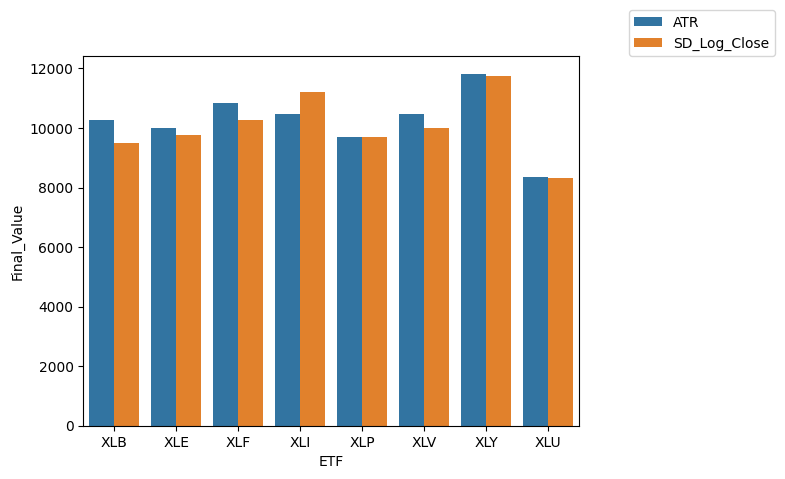

In [6]:
fig2,ax = plt.subplots()
sns.barplot(data=results,x="ETF",y="Final_Value",hue="Metric",ax=ax)
plt.legend(loc=(1.1,1))
fig2.savefig('return_metrics.png')


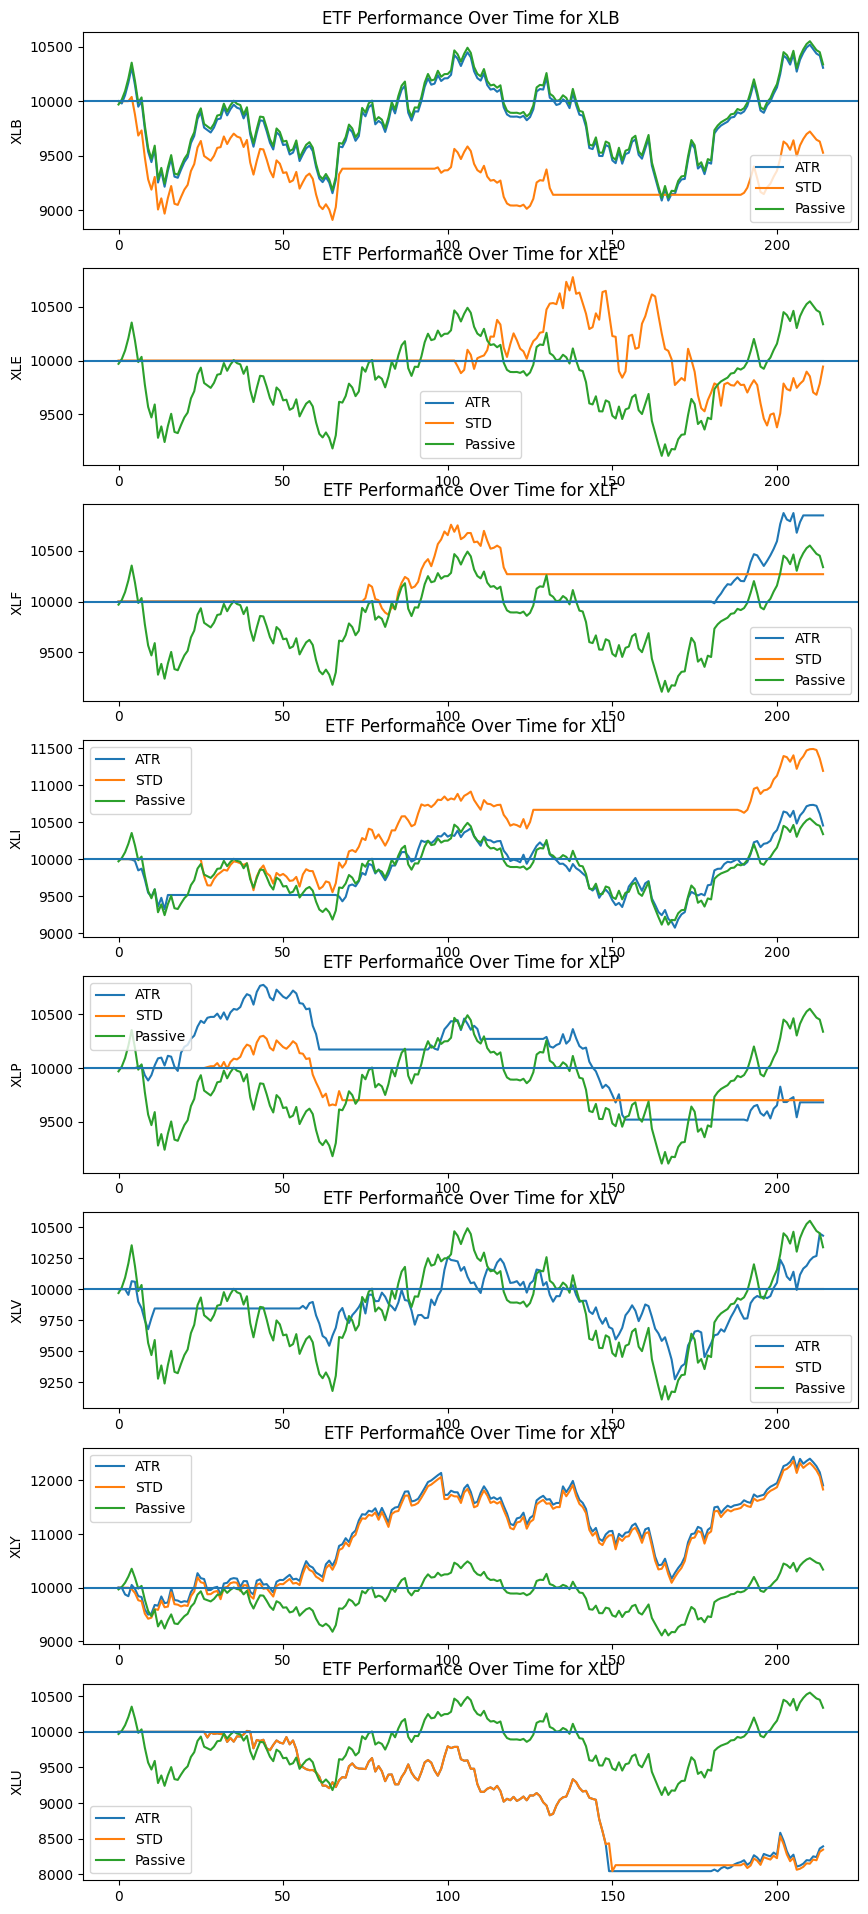

In [14]:
fig3,ax = plt.subplots(len(etfs),1,figsize=(10,24))


for i,etf in enumerate(money_df_atr.columns):
    sns.lineplot(x=range(0, 215), y=money_df_atr[etf], label="ATR", ax=ax[i])
    sns.lineplot(x=range(0,215),y=money_df_std[etf],label="STD",ax=ax[i])
    sns.lineplot(x=range(0,215),y=money_df_passive[f"XLB_SD_Log_Close_Passive"],label="Passive",ax=ax[i])
    ax[i].axhline(10000)
    ax[i].set_title(f"ETF Performance Over Time for {etf}")
plt.legend()  
plt.show()
      




In [8]:
overall_results = pd.read_csv('./runtest_20/overall_results.csv')
overall_results

,ETF,Metric,Final_Value,Passive_Potential,Relative_MSE
0,XLB,ATR,1044.552951,1030.095425,1.035830
1,XLB,Squared_Returns,874.174985,1030.095425,1.061955
2,XLE,ATR,935.675283,1257.954208,0.088680
3,XLE,Squared_Returns,827.539928,1257.954208,0.953019
4,XLF,ATR,847.015115,985.837923,0.076009
5,XLF,Squared_Returns,892.929993,985.837923,1.025737
6,XLI,ATR,1115.121934,1146.831530,1.152564
7,XLI,Squared_Returns,1000.000000,1146.831530,1.021567
8,XLP,ATR,1005.840859,975.665810,0.371718
9,XLP,Squared_Returns,975.084998,975.665810,0.996702
